In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

Read the data

In [2]:
#read csv file
portfolio = pd.read_csv('../../../Data/Portfolio.csv',parse_dates=True,index_col='T')
portfolio.head()

,DAX,NKY,SPX,SX5E,SX7E,SXAP,SXKP,PORTFOLIO
T,,,,,,,,
2014-10-08,-0.00437,-0.00520,0.00752,-0.00408,-0.00456,-0.00751,-0.00297,-0.00325
2014-10-09,0.00047,-0.00327,-0.00907,-0.00155,-0.00464,0.00024,-0.00558,-0.00562
2014-10-14,0.00179,-0.01046,-0.00653,0.00138,0.00075,0.01232,-0.00130,-0.01723
2014-10-15,-0.01265,0.00397,-0.00353,-0.01598,-0.02159,-0.01331,-0.01484,-0.00118
2014-10-16,0.00055,-0.00976,0.00006,-0.00270,-0.00929,0.00638,-0.00521,-0.00183


In [3]:
#tranform this into a matrix
X = portfolio.as_matrix()

#the last column is the target (portfolio return)
Y = X[:,-1]

#create the design matrix2
X = X[:,0:-1]

index_name = portfolio.columns[:-1]

Declear the linear regression model. In this example, we are not using an intercept

In [22]:
#setting up the model
ols_model = linear_model.LinearRegression(fit_intercept=False)
ols_model.fit(X,Y)

#evaluating the model
print('R_squared = {s:0.2f}\n'.format(s=ols_model.score(X,Y)))

i = 0
for c in ols_model.coef_:
    print('Coefficient for ' + portfolio.columns[i] + ': {d:0.2f}  '.format(d=c))
    i+=1

print('\nThe futures-hedges represent a gross exposure equal to {g:0.2f} %'.format(g=np.sum(np.abs(ols_model.coef_))*100))
print('Net exposure is {g:0.2f}'.format(g=100*np.sum(ols_model.coef_)))

R_squared = 0.57

Coefficient for DAX: 0.32  
Coefficient for NKY: 0.40  
Coefficient for SPX: 0.39  
Coefficient for SX5E: -0.14  
Coefficient for SX7E: 0.19  
Coefficient for SXAP: -0.24  
Coefficient for SXKP: 0.35  

The futures-hedges represent a gross exposure equal to 203.34 %
Net exposure is 127.77


In [16]:
#using the function to estimate the portfolio return
X_test = np.array([0.01 , 0.01, 0.02 , -0.05 , 0.0, 0.01,0.07]).reshape((1,len(ols_model.coef_)))
Y_test = ols_model.predict(X_test)
print(Y_test[0])

0.0443910075655


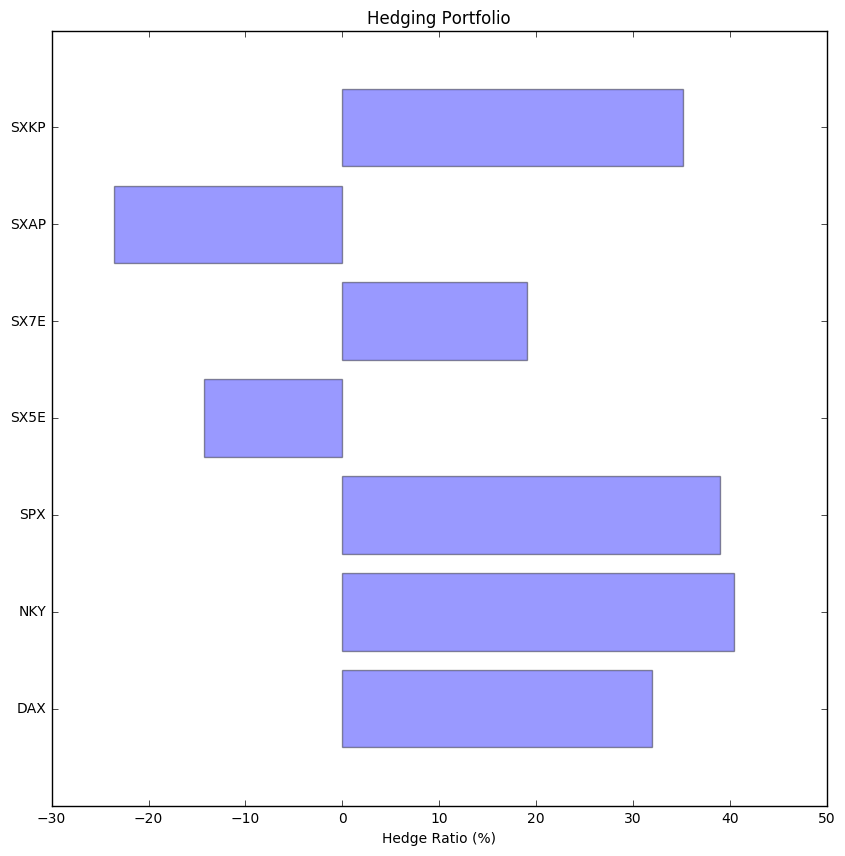

In [23]:

plt.figure(figsize=(10,10))
y_pos = np.arange(len(index_name))
hedge = ols_model.coef_
plt.barh(bottom=y_pos, width=hedge*100, align='center', alpha=0.4)
plt.yticks(y_pos, index_name)
plt.xlabel('Hedge Ratio (%)')
plt.title('Hedging Portfolio');
